# LIBRARIES


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

# INISIASI DATASET


In [2]:
# import
SENTIMENT_DATASET_FILE_NAME = "sentiment.csv"
SENTIMENT_DATASET_FILE_PATH = f"outputs/{SENTIMENT_DATASET_FILE_NAME}"
DATA_FRAME_SENTIMENT_DATASET = pd.read_csv(SENTIMENT_DATASET_FILE_PATH)
DATA_FRAME_SENTIMENT_DATASET_LENGTH = len(DATA_FRAME_SENTIMENT_DATASET)
print(f"labelled dataset: {DATA_FRAME_SENTIMENT_DATASET_LENGTH} tweets")
display(DATA_FRAME_SENTIMENT_DATASET.tail(1))
sentiment = DATA_FRAME_SENTIMENT_DATASET

labelled dataset: 4913 tweets


,user_id,username,user_display_name,tweet_id,full_text,created_at,cleaned_text,after_slang_text,underscore_negation_text,swap_negation_text,final_negation_text,is_different,after_stopwords_text,after_stemming_text,preprocessed_text,compound_score,positive_score,negative_score,sentiment_label
4912,1497098972443602944,RismaII4,Risma II 🇮🇩🇮🇩🇮🇩,1839477624550412418,Sebuah langkah besar menuju masa depan yang le...,Fri Sep 27 01:30:16 +0000 2024,sebuah langkah besar menuju masa depan yang le...,sebuah langkah besar menuju masa depan yang le...,sebuah langkah besar menuju masa depan yang le...,sebuah langkah besar menuju masa depan yang le...,sebuah langkah besar menuju masa depan yang le...,False,langkah berkesinambungan inklusif dukungan pem...,langkah sambung inklusif dukung bangun kota ne...,langkah sambung inklusif dukung bangun kota ne...,-0.0192,"{'neg': 0.0, 'neu': 0.357, 'pos': 0.643, 'comp...","{'neg': 0.758, 'neu': 0.242, 'pos': 0.0, 'comp...",negatif


# TF-IDF


In [3]:
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(sentiment["preprocessed_text"]).toarray()

# DATA SPLIT


In [4]:
X_train_9010,X_test_9010,Y_train_9010,Y_test_9010=train_test_split(X_tfidf, sentiment["sentiment_label"], test_size=0.1, random_state=21)
X_train_8020,X_test_8020,Y_train_8020,Y_test_8020=train_test_split(X_tfidf, sentiment["sentiment_label"], test_size=0.2, random_state=21)
X_train_7030,X_test_7030,Y_train_7030,Y_test_7030=train_test_split(X_tfidf, sentiment["sentiment_label"], test_size=0.3, random_state=21)

# KNN


grid search


In [5]:
gs_knn = KNeighborsClassifier()
param_grid = {
  'n_neighbors': [1, 3, 5, 7, 9],
  'weights': ['distance', 'uniform'],
  'metric': ['euclidean', 'manhattan', 'cosine']
}

def get_grid_search(X_train, Y_train, X_test, Y_test, ratio):
  # Initialize GridSearchCV with your model, parameter grid, and number of cross-validation folds
  grid_search = GridSearchCV(estimator=gs_knn, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1)

  # Assuming you have your training data X_train and y_train
  grid_search.fit(X_train, Y_train)

  # Best model
  best_knn = grid_search.best_estimator_

  print("===============================================================")
  print(f"| {ratio} split |")
  print("===============================================================")
  # Best hyperparameters
  print("Best Parameters:", grid_search.best_params_)
  # Evaluate the best model on your test set
  y_pred = best_knn.predict(X_test)
  accuracy = accuracy_score(Y_test, y_pred)
  print("Test Set Accuracy:", accuracy)
  print("===============================================================")

  return grid_search

gs_9010 = get_grid_search(X_train_9010, Y_train_9010, X_test_9010, Y_test_9010, "90:10")
gs_8020 = get_grid_search(X_train_8020, Y_train_8020, X_test_8020, Y_test_8020, "80:20")
gs_7030 = get_grid_search(X_train_7030, Y_train_7030, X_test_7030, Y_test_7030, "70:30")

| 90:10 split |
Best Parameters: {'metric': 'cosine', 'n_neighbors': 9, 'weights': 'distance'}
Test Set Accuracy: 0.7378048780487805
| 80:20 split |
Best Parameters: {'metric': 'cosine', 'n_neighbors': 9, 'weights': 'distance'}
Test Set Accuracy: 0.7650050864699899
| 70:30 split |
Best Parameters: {'metric': 'cosine', 'n_neighbors': 9, 'weights': 'distance'}
Test Set Accuracy: 0.7503392130257802


train


| 90:10 split |
| k = 9 |
              precision    recall  f1-score   support

     negatif       0.77      0.90      0.83       292
      netral       0.43      0.42      0.42        50
     positif       0.79      0.52      0.63       150

    accuracy                           0.74       492
   macro avg       0.66      0.61      0.63       492
weighted avg       0.74      0.74      0.73       492

| accuracy: 0.7378048780487805 |
| precision: 0.7392345789963487 |
| recall: 0.7378048780487805 |
| f1: 0.7268356080613855 |


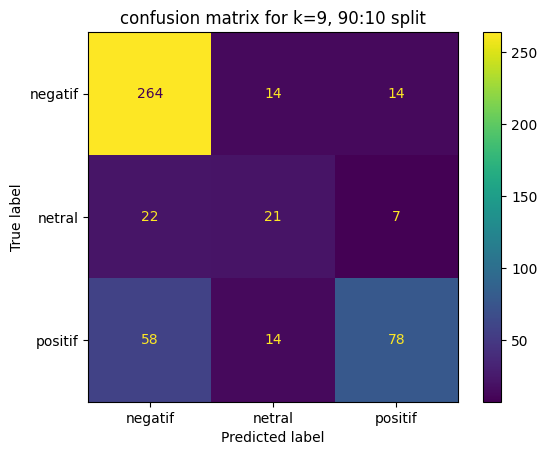

| 80:20 split |
| k = 9 |
              precision    recall  f1-score   support

     negatif       0.79      0.91      0.85       609
      netral       0.49      0.47      0.48       104
     positif       0.80      0.55      0.65       270

    accuracy                           0.77       983
   macro avg       0.70      0.64      0.66       983
weighted avg       0.76      0.77      0.76       983

| accuracy: 0.7650050864699899 |
| precision: 0.7644950768242378 |
| recall: 0.7650050864699899 |
| f1: 0.7555027987201813 |


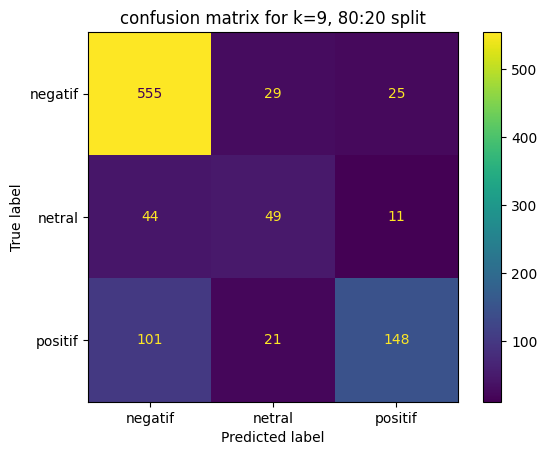

| 70:30 split |
| k = 9 |
              precision    recall  f1-score   support

     negatif       0.79      0.89      0.84       904
      netral       0.45      0.42      0.44       157
     positif       0.76      0.56      0.65       413

    accuracy                           0.75      1474
   macro avg       0.67      0.63      0.64      1474
weighted avg       0.75      0.75      0.74      1474

| accuracy: 0.7503392130257802 |
| precision: 0.7459086250108832 |
| recall: 0.7503392130257802 |
| f1: 0.74177392150566 |


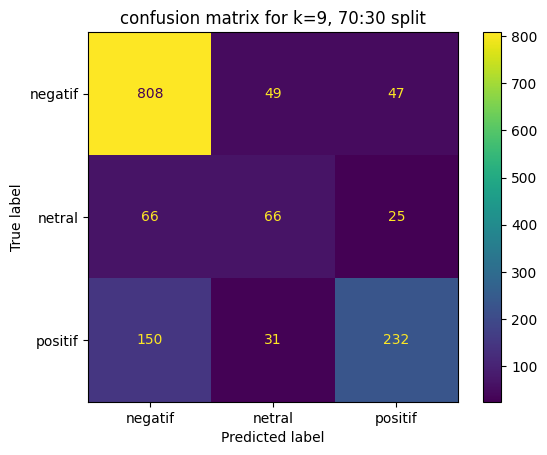

In [6]:
def train_evaluate_knn(k, X_train, Y_train, X_test, Y_test, ratio, w, m):
    knn = KNeighborsClassifier(n_neighbors=k, weights=w, metric=m)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred, average='weighted')
    recall = recall_score(Y_test, y_pred, average='weighted')
    f1 = f1_score(Y_test, y_pred, average='weighted')

    print("===============================================================")
    print(f"| {ratio} split |")
    print(f"| k = {k} |")
    print("===============================================================")
    print(classification_report(Y_test, y_pred, target_names=knn.classes_))
    print("===============================================================")
    
    # print(f"| accuracy: {accuracy:.2f} |")
    print(f"| accuracy: {accuracy} |")
    print(f"| precision: {precision} |")
    print(f"| recall: {recall} |")
    print(f"| f1: {f1} |")
    print("===============================================================")
    
    cm = confusion_matrix(Y_test, y_pred, labels=knn.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
    disp.plot()
    plt.title(f"confusion matrix for k={k}, {ratio} split")
    plt.show()
    
    return knn

best_9010 = gs_9010.best_params_
best_8020 = gs_8020.best_params_
best_7030 = gs_7030.best_params_

knn_9010 = train_evaluate_knn(best_9010["n_neighbors"], X_train_9010, Y_train_9010, X_test_9010, Y_test_9010, "90:10", best_9010["weights"], best_9010["metric"])
knn_8020 = train_evaluate_knn(best_8020["n_neighbors"], X_train_8020, Y_train_8020, X_test_8020, Y_test_8020, "80:20", best_8020["weights"], best_8020["metric"])
knn_7030 = train_evaluate_knn(best_7030["n_neighbors"], X_train_7030, Y_train_7030, X_test_7030, Y_test_7030, "70:30", best_7030["weights"], best_7030["metric"])